Automatically created module for IPython interactive environment


<BarContainer object of 24 artists>

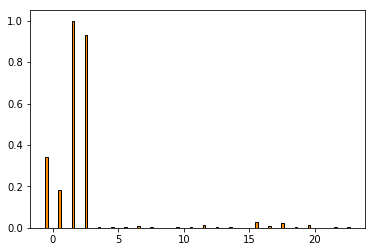

In [21]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

# #############################################################################
# Import some data to play with

# The iris dataset
iris = datasets.load_iris()

# Some noisy data not correlated
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))
# Add the noisy data to the informative features
X = np.hstack((iris.data, E))
y = iris.target

plt.figure(1)
plt.clf()
X_indices = np.arange(X.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 10% most significant features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

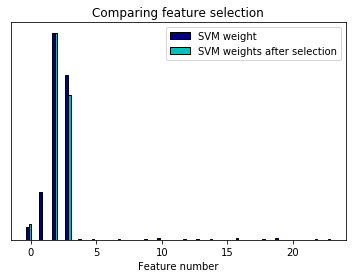

In [22]:
# #############################################################################
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy', edgecolor='black')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c',
        edgecolor='black')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
E

array([[1.56188857, 2.22866216, 2.3672463 , ..., 3.26276732, 2.3573221 ,
        3.94878784],
       [4.5371296 , 1.51053299, 2.31892754, ..., 4.89527413, 1.87854181,
        3.08463398],
       [4.98124625, 1.94942089, 3.69584226, ..., 3.81727128, 1.2192056 ,
        3.74817416],
       ...,
       [2.91200477, 3.06259388, 0.10885761, ..., 0.89458796, 3.93971789,
        4.31881866],
       [4.12598475, 2.48268981, 4.67746765, ..., 2.9498643 , 0.69100782,
        4.95841031],
       [2.40546538, 4.88935809, 4.96938976, ..., 0.24873079, 4.41907676,
        2.86937861]])

In [9]:
np.mean(E[0])

2.4727939798214122

In [12]:
E[:, -1] 

array([3.94878784, 3.08463398, 3.74817416, 2.61859513, 1.54133362,
       2.98894191, 3.33206156, 1.17044267, 4.30920698, 2.0102508 ,
       2.15434805, 1.0110561 , 3.17425496, 3.67271257, 3.29016623,
       1.05760553, 0.56465515, 4.82674182, 3.79604874, 2.62902742,
       4.95673533, 2.03025423, 4.65862094, 1.6425019 , 4.48936891,
       1.6386006 , 2.58939607, 1.99706037, 4.50315238, 3.55833103,
       3.67955638, 0.85825152, 4.57484455, 0.55705153, 4.55572201,
       2.10092331, 0.84516878, 1.54603588, 3.74577381, 3.20211341,
       4.60916191, 0.304847  , 2.62514364, 2.42868682, 4.69571127,
       3.21817044, 1.27528719, 4.92078725, 2.54938195, 2.23688898,
       2.98961121, 3.19427755, 2.51379562, 0.77770745, 4.40022111,
       2.88951581, 4.91214847, 2.24490054, 2.6018014 , 1.33935621,
       4.82440903, 2.92113345, 0.94903787, 4.32037713, 0.70082259,
       0.94942516, 4.08911586, 0.56937515, 1.75626186, 3.06084404,
       0.30712569, 3.99119354, 3.69753689, 4.23980572, 2.33736

In [23]:
# test my data: video

In [26]:
import numpy as np
import os
import pickle
from matplotlib import pyplot as plt
from PIL import Image

In [32]:
from utils import label_map_util

from utils import visualization_utils as vis_util

utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 107

In [33]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('/root/models/research/object_detection/data', 'oid_bbox_trainable_label_map_add2.pbtxt')
NUM_CLASSES = 547

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [27]:
od_inference_dirs = ['od_1252812627_1fps', 'od_1252812923_1fps', 'od_169182094_1fps', 'od_169182098_1fps', 'od_279703428_1fps', 'od_279703885_1fps', 'od_942334491_1fps', 'od_942334494_1fps', 'od_3438636448_1fps', 'od_3477876483_1fps', 'od_3423612893_1fps', 'od_3497684122_1fps', 'od_3498539801_1fps', 'od_3498532459_1fps', 'od_3491078546_1fps', 'od_3582306776_1fps', 'od_3468314939_1fps']

labels = [0, 0, 1, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11]

label2name = {0:'Game of Throne', 1: 'Friends', 2: 'Sopranos', 3: 'Breaking Bad', 4: 'Africa\'s Hunters', 5: 'Africa\'s Wild', 6: 'Big Bang Theory', 7: '16 and Pregnant', 8: 'Teen Mom', 9: '4th & Forever', 10: '24/7 College', 11: 'Camelot'}

In [28]:
with open('/root/openimage/f_score_v5.pickle', 'rb') as handle:
    maxF_dict = pickle.load(handle)

In [29]:
def read_frames_todict(input_dir):
# input_dir = '/root/video_inference/od_infrence_1252812627'
    od_dict = {}
    for folder in sorted(os.listdir(input_dir)):
        input_file = os.path.join(input_dir, folder)
        with open(input_file, 'rb') as handle:
            output_dict = pickle.load(handle)
        od_dict[folder] = output_dict
    return od_dict

def calculate_words(od_dict, NUM_CLASSES, maxF_dict):
    class_counts = { idx+1:0 for idx in range(NUM_CLASSES)}
    for key, frame in od_dict.items():
        for c, prob in zip(frame['detection_classes'], frame['detection_scores']):
            if prob > maxF_dict[c]['Threshold']:
                class_counts[c] += 1
    return class_counts

def plot_class(od_dir, results, NUM_CLASSES, topN=5, out_path=''):
    results[od_dir]['Words']
    total_cnt = 0
#     for cnt in results[od_dir]['Words'].values():
#         total_cnt += cnt
    total_cnt = sum(results[od_dir]['Words'].values())
    xx = [x+1 for x in range(NUM_CLASSES)]
    yy = [results[od_dir]['Words'][x+1]*100.0/total_cnt   for x in range(NUM_CLASSES)  ]
    plt.xlim(0, 547);
    # plt.ylim(0, 1.0);
    plt.plot(xx, yy, 'ob');
    print_topN(od_dir, results, topN)
    if out_path:
        plt.savefig(out_path, transparent=False, dpi = 300)
        
def print_topN(od_dir, results, topN=5):
    wordsFreqDict=results[od_dir]['Words']
    # Create a list of tuples sorted by index 1 i.e. value field     
    listofTuples = sorted(wordsFreqDict.items() ,  key=lambda x: x[1], reverse=True)
    # Iterate over the sorted sequence
    total_cnt = sum(results[od_dir]['Words'].values())
#     print('ID', 'frequency', 'Name' )
    print("{0},{1},{2}".format('ID', 'frequency (%)', 'Name' ))
    for elem in listofTuples[0:topN] :
#         print(elem[0] , elem[1]*100.0/total_cnt, category_index[elem[0]]['name'] )
        print("{0},{1:0.2f},{2}".format(elem[0] , elem[1]*100.0/total_cnt, category_index[elem[0]]['name']))





In [34]:
results={}
inference_dir = '/root/ampvideo_inference/'
for od_dir in od_inference_dirs:

    results[od_dir] = {}
    results[od_dir]['Raw'] = read_frames_todict(inference_dir+od_dir)
    results[od_dir]['Words'] = calculate_words(results[od_dir]['Raw'], NUM_CLASSES, maxF_dict)
#     plot_class(od_dir, results, NUM_CLASSES,20)

In [114]:
od_inference_dirs_select = []
labels_select = []
for idx, label in enumerate(labels): 
    if label in [0,1,4, 10]:
        labels_select.append(label)
        od_inference_dirs_select.append(od_inference_dirs[idx])

In [36]:
results[od_dir]['Words']

{1: 3362,
 2: 3530,
 3: 1172,
 4: 2517,
 5: 198,
 6: 43,
 7: 2412,
 8: 271,
 9: 20,
 10: 5,
 11: 6,
 12: 462,
 13: 58,
 14: 0,
 15: 9,
 16: 10,
 17: 0,
 18: 38,
 19: 55,
 20: 4,
 21: 0,
 22: 527,
 23: 20,
 24: 0,
 25: 1,
 26: 4,
 27: 1,
 28: 190,
 29: 463,
 30: 1,
 31: 0,
 32: 9328,
 33: 0,
 34: 43,
 35: 11,
 36: 0,
 37: 18087,
 38: 5,
 39: 13035,
 40: 0,
 41: 0,
 42: 4,
 43: 0,
 44: 0,
 45: 7391,
 46: 0,
 47: 10185,
 48: 0,
 49: 15,
 50: 2,
 51: 29,
 52: 52,
 53: 0,
 54: 2,
 55: 5461,
 56: 0,
 57: 11,
 58: 54,
 59: 0,
 60: 0,
 61: 1,
 62: 3318,
 63: 0,
 64: 3950,
 65: 0,
 66: 0,
 67: 0,
 68: 54,
 69: 1,
 70: 149,
 71: 0,
 72: 0,
 73: 4,
 74: 1,
 75: 0,
 76: 45,
 77: 0,
 78: 0,
 79: 2,
 80: 0,
 81: 22,
 82: 6,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 3,
 92: 1,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 2,
 101: 0,
 102: 0,
 103: 0,
 104: 14,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 334,
 114: 0,
 115: 

In [115]:
x_array = []
for od_dir in od_inference_dirs_select:
    

    x_array.append(results[od_dir]['Words'].values())
x_array = np.array(x_array)

In [116]:
x_array

array([[3800, 3592, 1313, ...,    0,    0,    0],
       [3408, 3023, 1233, ...,    0,    0,    0],
       [1417, 3863, 1083, ...,    0,    0,    0],
       [1259, 2917,  918, ...,    0,    0,    0],
       [  12,    0,    0, ...,    0,    0,    0],
       [6305, 6883, 3468, ...,    0,    0,    0]])

Automatically created module for IPython interactive environment


<BarContainer object of 547 artists>

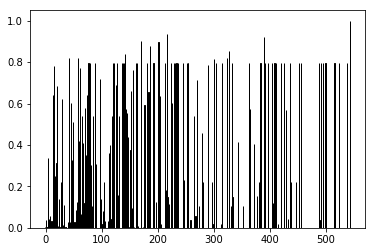

In [122]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

# #############################################################################
# Import some data to play with

# The iris dataset
# iris = datasets.load_iris()

# Some noisy data not correlated
# E = np.random.uniform(0, 0.001, size=(x_array.shape[0], x_array.shape[1]))
# E = np.ones_like(x_array)
# Add the noisy data to the informative features
# X = x_array+E
X = x_array
y = labels_select

plt.figure(1)
plt.clf()
X_indices = np.arange(X.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 10% most significant features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
# scores = -np.log10(selector.pvalues_)
scores = selector.pvalues_
# scores /= scores.max()
scores /= np.nanmax(scores)
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

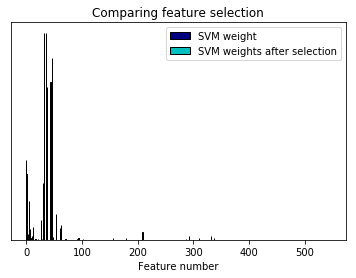

In [125]:
# #############################################################################
# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy', edgecolor='black')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c',
        edgecolor='black')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

In [119]:
X

array([[3800, 3592, 1313, ...,    0,    0,    0],
       [3408, 3023, 1233, ...,    0,    0,    0],
       [1417, 3863, 1083, ...,    0,    0,    0],
       [1259, 2917,  918, ...,    0,    0,    0],
       [  12,    0,    0, ...,    0,    0,    0],
       [6305, 6883, 3468, ...,    0,    0,    0]])

In [67]:
scores

array([8.87688280e-03, 6.35558730e-02, 1.49467137e-02, 2.96208055e-03,
       2.25487599e-01, 5.92279870e-04, 2.96789601e-02, 1.18363361e-02,
       1.93442831e-01, 7.65076508e-01, 5.31055168e-01, 2.59068813e-02,
       1.20640054e-04, 5.44064748e-01, 5.51734361e-01, 5.39223212e-01,
       5.94447797e-01, 2.36083310e-02, 6.71949777e-01, 6.01736973e-01,
       5.64581458e-01, 5.33282593e-01, 3.05481608e-03, 8.30078125e-01,
       9.78856695e-03, 3.87882220e-01, 2.98002193e-04, 3.65036364e-01,
       1.85635698e-01, 4.66063257e-01, 8.41682199e-02, 8.57021427e-03,
       0.00000000e+00, 2.30891720e-01, 1.39141999e-02, 0.00000000e+00,
       1.07932284e-03, 9.76562500e-03, 9.83147020e-05,            nan,
       2.19298246e-02, 1.73428482e-02, 6.25000000e-01,            nan,
       1.71333473e-02, 4.56989247e-01, 5.42115644e-03, 2.56147541e-01,
       2.31918701e-01, 0.00000000e+00, 3.57142857e-01, 6.52741514e-03,
       1.83823529e-02,            nan, 5.65656654e-02, 4.83870968e-01,
      

In [69]:
selector.transform(X)

array([[ 3800,  2521,   480,   878,   378,    15,     2,     7,  7635,
            0,     0, 16111,     6, 13156,  7601,     1,    18,   115,
           10,     0,    26,     0,     0,     0,    19,   268,     2,
            0,     0,     0,     1,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     1,     0,     0,     0,     0,     0,     0,     0,
            1],
       [ 3408,  2545,   543,   723,   351,    48,     1,    12,  7193,
            0,     0, 16780,     7, 13291,  8220,     1,    17,   104,
            6,     0,    15,     1,     0,     0,     1,   281,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            1],
       [ 1417,  1019,   108,   200,     7,   608,    23,     1,  4003,
           10,     0,  4782,     0,  2713,  6

In [70]:
clf_selected.coef_

array([[ 1.83160014e-05,  1.15445380e-05,  2.85923312e-06,
         5.21118295e-06,  2.85154701e-06, -4.55786355e-06,
        -1.61408321e-07,  4.61166633e-08,  2.79159535e-05,
        -7.68611055e-08,  0.00000000e+00,  8.70759464e-05,
         4.61166633e-08,  8.02660524e-05,  5.12663573e-06,
         7.68611055e-09,  6.91749949e-08,  8.83902713e-07,
        -1.91384153e-06,  0.00000000e+00,  1.99838874e-07,
         0.00000000e+00,  0.00000000e+00, -7.68611055e-09,
         1.46036100e-07,  2.05987763e-06,  1.53722211e-08,
        -1.53722211e-08,  0.00000000e+00,  0.00000000e+00,
         7.68611055e-09,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -7.68611055e-09,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -7.68611055e-09,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.68611055e-09,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [73]:
svm_weights_selected

array([5.52471159e-02, 2.42587818e-02, 2.67106169e-01, 4.33877871e-02,
       8.98351541e-02, 7.08175663e-03, 8.69440840e-06, 1.02848309e-03,
       2.72264127e-01, 2.14136546e-06, 1.21441814e-06, 1.00000000e+00,
       1.34138677e-07, 5.47455726e-01, 8.12163091e-01, 1.09025844e-05,
       1.29276680e-06, 4.42995234e-04, 1.93015823e-03, 1.89752834e-08,
       7.54834105e-04, 6.85007729e-06, 4.74382084e-07, 2.14136546e-08,
       9.64997289e-04, 2.67621564e-04, 3.69800415e-06, 8.56546186e-08,
       1.89752834e-08, 3.20682289e-06, 1.59245960e-05, 3.03604534e-07,
       7.59011335e-06, 4.01516996e-05, 7.59011335e-08, 7.59011335e-08,
       1.89752834e-08, 2.14136546e-08, 1.89752834e-08, 6.83110201e-07,
       4.01516996e-05, 2.14136546e-08, 7.29409893e-05, 1.03908652e-04,
       1.70777550e-07, 1.89752834e-08, 2.28557063e-06, 6.83110201e-07,
       1.70777550e-07, 4.26943876e-06, 9.29788885e-07, 1.89752834e-08,
       1.89752834e-08, 1.89752834e-08, 3.72607435e-09])

In [74]:
svm_weights

array([5.72662508e-02, 1.92232303e-01, 1.95039130e-02, 2.54872409e-02,
       9.18974521e-03, 3.11585176e-01, 5.99331700e-02, 4.99208145e-02,
       4.93724912e-04, 1.32180983e-06, 2.83026088e-04, 2.13733510e-02,
       1.04622818e-01, 8.19145186e-06, 1.97599409e-04, 9.45139878e-07,
       1.44432595e-05, 2.43718505e-03, 1.07234273e-05, 4.72981962e-07,
       3.96013669e-07, 5.46330826e-05, 7.75355169e-03, 9.12608814e-07,
       9.50389750e-06, 5.44754675e-08, 1.20074421e-03, 2.52243003e-04,
       3.90475784e-03, 1.44192999e-04, 5.09071079e-05, 3.02171323e-01,
       2.35380249e-06, 5.06102297e-08, 1.49393144e-04, 1.41806795e-06,
       1.00000000e+00, 1.07955738e-07, 4.94441758e-01, 0.00000000e+00,
       7.88764449e-07, 3.22222695e-04, 3.58534562e-07, 0.00000000e+00,
       5.52158920e-01, 6.72315516e-07, 9.48507199e-01, 3.29540503e-07,
       1.80176707e-04, 1.27267770e-05, 3.32063540e-08, 1.40484797e-06,
       3.16381460e-06, 0.00000000e+00, 8.06027033e-02, 5.03105999e-07,
      

In [108]:
scores

array([1.40596082e-02, 1.02550541e-01, 2.52218466e-02, 4.82314955e-03,
       3.20426756e-01, 9.57375696e-04, 3.57289272e-02, 1.95224092e-02,
       2.92714960e-01, 1.00000000e+00, 2.98231364e-01, 2.94199481e-02,
       1.90582115e-04, 7.86063820e-01, 6.62890736e-01, 6.82439485e-01,
       8.30063259e-01, 3.65738280e-02, 8.90235894e-01, 5.21290724e-01,
       8.05209813e-01, 7.70761426e-01, 4.69679834e-03, 1.20969988e-01,
       1.50259616e-02, 5.84922671e-01, 4.89042610e-04, 8.14117533e-03,
       2.33768618e-01, 6.27413200e-01, 1.28967120e-01, 1.36493763e-02,
       0.00000000e+00, 2.50784612e-01, 2.17253261e-02, 0.00000000e+00,
       1.68073631e-03, 1.59675560e-02, 1.61510202e-04,            nan,
       3.33101429e-02, 2.82984202e-02, 8.75331737e-01,            nan,
       2.70331063e-02, 6.43733786e-01, 9.08150620e-03, 1.42990859e-01,
       3.39665866e-01, 0.00000000e+00, 4.71575606e-01, 4.56525064e-04,
       2.94761408e-02,            nan, 9.22859314e-02, 1.21694490e-01,
      

In [78]:
len(svm_weights)

547

In [126]:
select = np.where(scores > 0.7)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [109]:
select[0]

array([  9,  16,  18,  20,  42,  58,  72,  73,  78,  79,  83,  85,  89,
        93, 113, 121, 122, 128, 131, 137, 139, 141, 142, 157, 162, 163,
       166, 170, 171, 177, 181, 186, 194, 201, 202, 203, 213, 217, 218,
       224, 226, 230, 232, 234, 237, 246, 253, 254, 255, 268, 275, 280,
       291, 301, 304, 305, 315, 327, 333, 384, 391, 392, 397, 404, 409,
       412, 420, 426, 437, 453, 456, 488, 491, 492, 495, 500, 516, 524,
       539])

In [127]:
select[0]
for item in select[0]:
    print(category_index[item])

{'id': 16, 'name': u'Wheel'}
{'id': 42, 'name': u'Chair'}
{'id': 58, 'name': u'Door'}
{'id': 62, 'name': u'Eye'}
{'id': 77, 'name': u'Desk'}
{'id': 79, 'name': u'Vegetable'}
{'id': 89, 'name': u'Ball'}
{'id': 98, 'name': u'Shelf'}
{'id': 121, 'name': u'Sun hat'}
{'id': 122, 'name': u'Coffee cup'}
{'id': 128, 'name': u'Coat'}
{'id': 137, 'name': u'Computer keyboard'}
{'id': 139, 'name': u'Dairy'}
{'id': 141, 'name': u'Fedora'}
{'id': 142, 'name': u'Seafood'}
{'id': 157, 'name': u'Countertop'}
{'id': 162, 'name': u'Maple'}
{'id': 163, 'name': u'Saucer'}
{'id': 171, 'name': u'Plumbing fixture'}
{'id': 181, 'name': u'Canoe'}
{'id': 186, 'name': u'Cowboy hat'}
{'id': 187, 'name': u'Clock'}
{'id': 193, 'name': u'Squirrel'}
{'id': 201, 'name': u'Baseball glove'}
{'id': 202, 'name': u'Juice'}
{'id': 203, 'name': u'Skirt'}
{'id': 213, 'name': u'Ski'}
{'id': 217, 'name': u'Tap'}
{'id': 224, 'name': u'Sandal'}
{'id': 230, 'name': u'Lifejacket'}
{'id': 232, 'name': u'Strawberry'}
{'id': 234, 'name